In [1]:
# just a basic chatbot 
# Start -> chat-node -> End

In [49]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated

from langchain_core.messages import BaseMessage, HumanMessage

from langchain_google_genai import ChatGoogleGenerativeAI

# import operator

from langgraph.graph.message import add_messages

from langgraph.checkpoint.memory import MemorySaver

In [7]:
# defining state

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]      # better to keep basemessgae here
    # also need reducer function so can concatenate all messages



In [12]:
# Defining the functions used in chat_node

llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

def chat_node(state: ChatState):  # just defined the function name which takes in the state and returnst e state too

    # take in the message input query
    messages = state["messages"]

    #send to llm
    response = llm.invoke(messages)

    # response store in state
    return {'messages' : [response]}



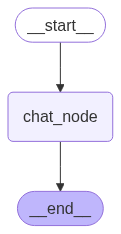

In [50]:
# a checkpointer for persistence

checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add node
graph.add_node('chat_node', chat_node)

# add edge

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer) # checkpointer for persistence

chatbot

In [ ]:
initial_state = {
    'messages' : [HumanMessage(content = "Capital of India")]
}

result = chatbot.invoke(initial_state)

In [25]:
result

{'messages': [HumanMessage(content='CApital of India', additional_kwargs={}, response_metadata={}, id='2db514d4-a828-4664-a775-e8cf4db4c856'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--537c959a-ff2d-4133-bc94-6ac76c82313a-0', usage_metadata={'input_tokens': 5, 'output_tokens': 26, 'total_tokens': 31, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 17}})]}

In [24]:
type(result)

dict

In [32]:
print(result.keys())

dict_keys(['messages'])


In [34]:
result['messages']
type(result['messages'])

list

In [35]:
len(result['messages'])

2

In [36]:
result['messages'][0]

HumanMessage(content='CApital of India', additional_kwargs={}, response_metadata={}, id='2db514d4-a828-4664-a775-e8cf4db4c856')

In [40]:
print(type(result['messages'][1]))
result['messages'][1]

<class 'langchain_core.messages.ai.AIMessage'>


AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--537c959a-ff2d-4133-bc94-6ac76c82313a-0', usage_metadata={'input_tokens': 5, 'output_tokens': 26, 'total_tokens': 31, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 17}})

In [41]:
result['messages'][1].content

'The capital of India is **New Delhi**.'

In [23]:
result['messages'][-1].content

'The capital of India is **New Delhi**.'

In [ ]:
# just a simple question answer till now

In [46]:
# # So now let's do it in loop


# while True:

#     user_message = input('Type Here : ')

#     if user_message.strip().lower() in ['exit', 'quit', 'bye']:
#         break
#     response = chatbot.invoke({'messages': [HumanMessage(content = user_message)]})

#     print("AI: ", response['messages'][-1].content)

# here we have are invoking everyting for the loop, so no previous memory of states

In [52]:
# So now let's do it in loop + with persistence

# store in databse    OR 
# store in RAM

# need a thread with chatbot for persistence
thread_id = '1'

while True:

    user_message = input('Type Here : ')

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable' : {'thread_id' : thread_id}}

    response = chatbot.invoke({'messages': [HumanMessage(content = user_message)]},
                              config = config)
    # need a thread with chatbot for persistence

    print("AI: ", response['messages'][-1].content)

AI:  Ciao Akash! Piacere.
AI:  Sto bene, grazie! Come intelligenza artificiale, non ho sentimenti o stati d'animo come gli esseri umani, ma sono qui e pronto ad aiutarti.

E tu, come stai?
AI:  Ottimo obiettivo, Akash! Passare l'esame A2 di italiano entro il 20 settembre è un traguardo ambizioso ma assolutamente realizzabile con dedizione e la giusta strategia. Hai circa 3 mesi e mezzo, che sono sufficienti per consolidare le basi e affrontare l'esame.

Ecco una strategia dettagliata per aiutarti:

### 1. Comprendere il Livello A2

Il livello A2 (elementare) secondo il Quadro Comune Europeo di Riferimento per le Lingue (QCER) significa che dovresti essere in grado di:

*   **Capire** frasi ed espressioni di uso frequente relative a settori di pertinenza più immediata (es. informazioni personali e familiari di base, acquisti, geografia locale, lavoro).
*   **Comunicare** in situazioni semplici e di routine che richiedano solo uno scambio di informazioni semplice e diretto su argomenti f

In [54]:
chatbot.get_state(config = config)

StateSnapshot(values={'messages': [HumanMessage(content='ciao mi chiamo akash', additional_kwargs={}, response_metadata={}, id='14c03c7a-933e-41ef-8cb3-9145c4b5c18d'), AIMessage(content='Ciao Akash! Piacere.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--7be503e8-cc26-447f-8c87-7025021b5d4f-0', usage_metadata={'input_tokens': 8, 'output_tokens': 255, 'total_tokens': 263, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 248}}), HumanMessage(content='come stai ?', additional_kwargs={}, response_metadata={}, id='acee438d-26eb-486c-99b9-3a575b65f3c9'), AIMessage(content="Sto bene, grazie! Come intelligenza artificiale, non ho sentimenti o stati d'animo come gli esseri umani, ma sono qui e pronto ad aiutarti.\n\nE tu, come stai?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'saf

In [45]:
# but there is no memory of past conversations here